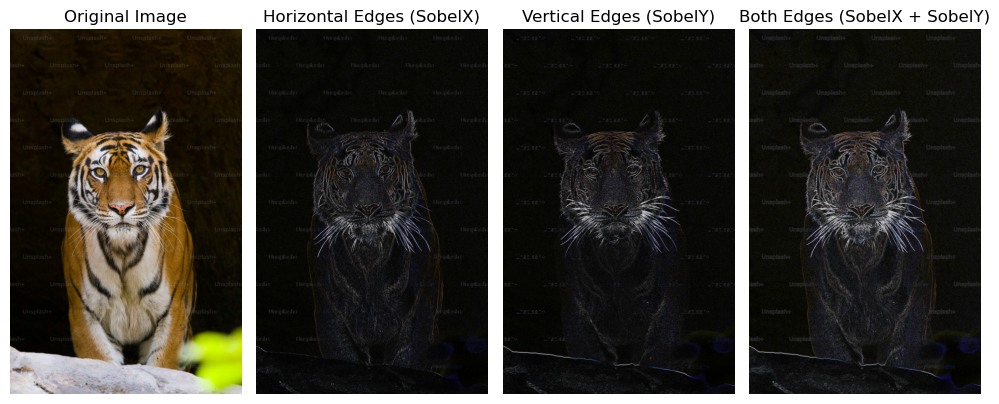

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('tiger.jpg')

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

sobel_x_disp = cv2.convertScaleAbs(sobel_x)
sobel_y_disp = cv2.convertScaleAbs(sobel_y)
sobel_combined_disp = cv2.convertScaleAbs(sobel_combined)

plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(sobel_x_disp, cv2.COLOR_BGR2RGB))
plt.title('Horizontal Edges (SobelX)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(sobel_y_disp, cv2.COLOR_BGR2RGB))
plt.title('Vertical Edges (SobelY)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(sobel_combined_disp, cv2.COLOR_BGR2RGB))
plt.title('Both Edges (SobelX + SobelY)')
plt.axis('off')

plt.tight_layout()
plt.show()





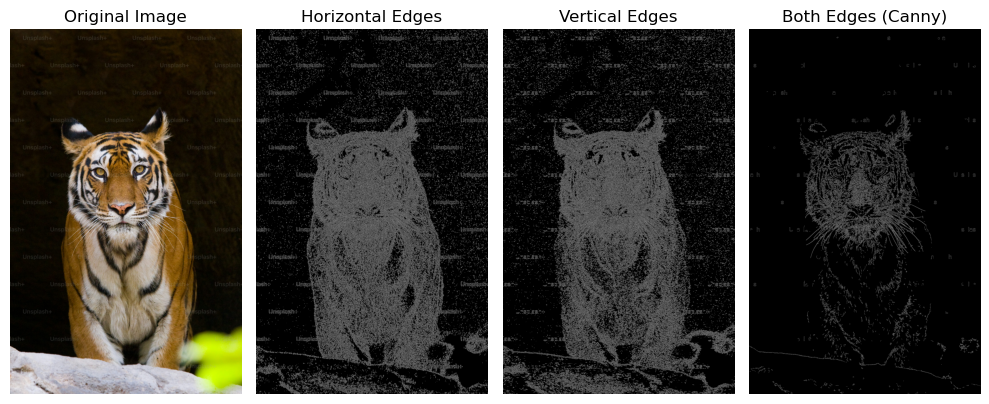

In [18]:


import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('tiger.jpg')

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

canny_x = cv2.Canny(sobel_x, 50, 150)
canny_y = cv2.Canny(sobel_y, 50, 150)
canny_combined = cv2.Canny(image, 50, 150)

plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(canny_x, cv2.COLOR_BGR2RGB))
plt.title('Horizontal Edges')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(canny_y, cv2.COLOR_BGR2RGB))
plt.title('Vertical Edges')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(canny_combined, cv2.COLOR_BGR2RGB))
plt.title('Both Edges (Canny)')
plt.axis('off')

plt.tight_layout()
plt.show()



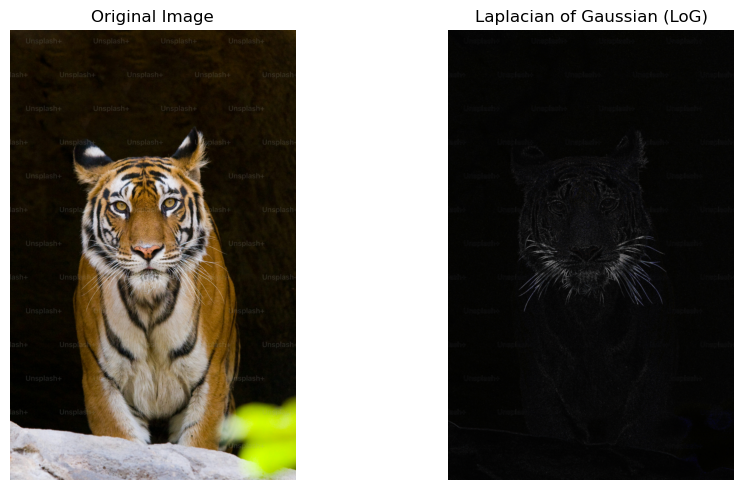

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('tiger.jpg')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

blurred = cv2.GaussianBlur(image, (3, 3), 0)
laplacian = cv2.Laplacian(blurred, cv2.CV_64F, ksize=3)
laplacian = cv2.convertScaleAbs(laplacian)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB))
plt.title('Laplacian of Gaussian (LoG)')
plt.axis('off')

plt.tight_layout()
plt.show()



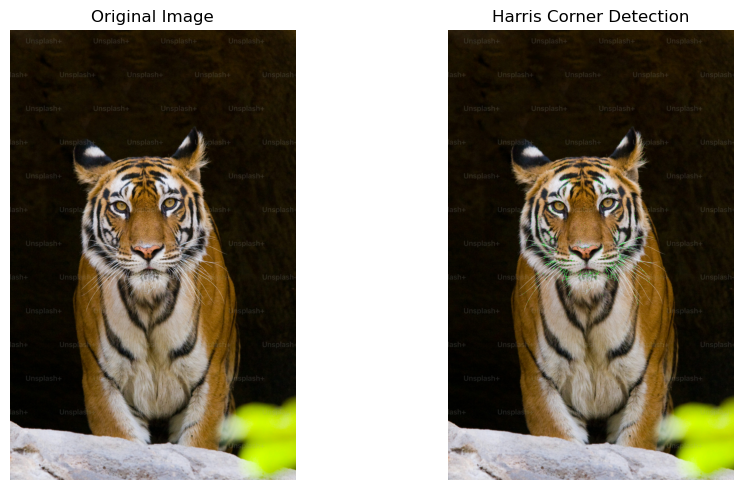

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('tiger.jpg')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)

image_with_corners = image.copy()
image_with_corners[dst > 0.01 * dst.max()] = [0, 255, 0]

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')

plt.tight_layout()
plt.show()



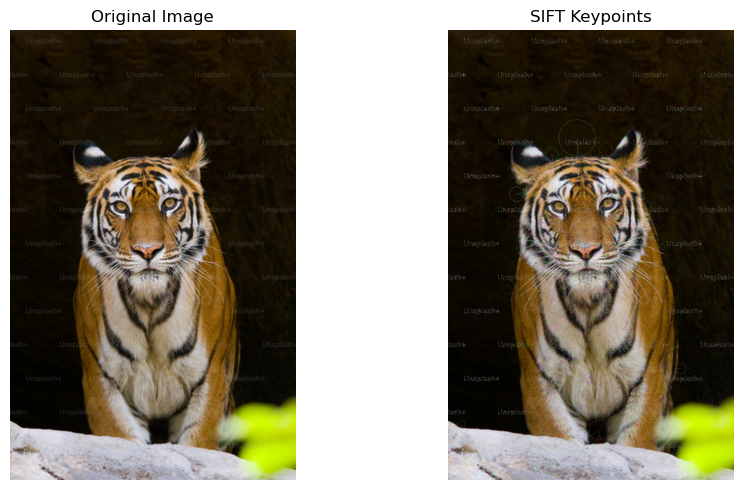

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('tiger.jpg')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)
image_sift = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_sift, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.axis('off')

plt.tight_layout()
plt.show()



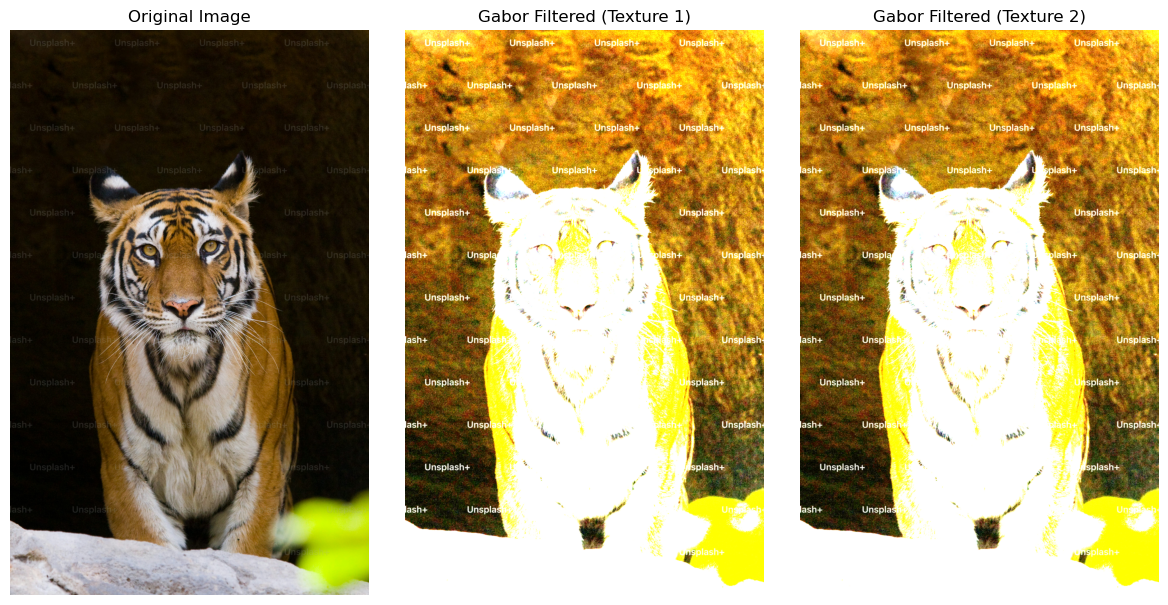

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('tiger.jpg')

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

def gabor_filter_bank(img, ksize=5, sigma=1.0, theta_values=[0, np.pi/4, np.pi/2, 3*np.pi/4], lambd=10.0, gamma=0.5):
    filtered_images = []
    for theta in theta_values:
        kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, 0, ktype=cv2.CV_32F)
        filtered_img = cv2.filter2D(img, cv2.CV_8UC3, kernel)
        filtered_images.append(filtered_img)
    return filtered_images

filtered_images = gabor_filter_bank(image)

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(filtered_images[1], cv2.COLOR_BGR2RGB))
plt.title('Gabor Filtered (Texture 1)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(filtered_images[2], cv2.COLOR_BGR2RGB))
plt.title('Gabor Filtered (Texture 2)')
plt.axis('off')

plt.tight_layout()
plt.show()




In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

def create_gaussian_filters(sigmas):
    """Create Gaussian filters at different scales."""
    filters = []
    for sigma in sigmas:
        size = 2 * int(4 * sigma) + 1  # Filter size based on sigma
        gaussian = cv2.getGaussianKernel(size, sigma)
        gaussian_2d = np.outer(gaussian, gaussian)
        filters.append(('Gaussian σ=' + str(sigma), gaussian_2d))
    return filters

def create_log_filters(sigmas):
    """Create Laplacian of Gaussian filters at different scales."""
    filters = []
    for sigma in sigmas:
        size = 2 * int(4 * sigma) + 1
        x = np.linspace(-size//2, size//2, size)
        y = np.linspace(-size//2, size//2, size)
        X, Y = np.meshgrid(x, y)
        R2 = X*2 + Y*2
        log_filter = (R2 - 2*sigma*2) * np.exp(-R2/(2*sigma2)) / (2*np.pi*sigma*4)
        filters.append(('LoG σ=' + str(sigma), log_filter))
    return filters

def create_gabor_filters(scales, orientations):
    """Create Gabor filters at different scales and orientations."""
    filters = []
    for sigma in scales:
        for theta in orientations:
            kernel_size = 2 * int(4 * sigma) + 1
            # Gabor parameters
            lambda_val = sigma * 2
            gamma = 0.5  # Spatial aspect ratio
            psi = 0      # Phase offset
            
            kernel = cv2.getGaborKernel((kernel_size, kernel_size), 
                                      sigma, theta, lambda_val, gamma, psi)
            filters.append((f'Gabor σ={sigma} θ={theta:.1f}', kernel))
    return filters

def apply_filter_bank(image, filters):
    """Apply a bank of filters to an image."""
    responses = []
    for name, kernel in filters:
        # Apply filter
        response = cv2.filter2D(image, cv2.CV_64F, kernel)
        responses.append((name, response))
    return responses

def plot_filters_and_responses(filters, responses, num_cols=4):
    """Plot filters and their responses."""
    total_filters = len(filters)
    num_rows = (total_filters * 2 + num_cols - 1) // num_cols
    
    plt.figure(figsize=(15, 2*num_rows))
    
    for idx, ((filter_name, filter_kernel), (response_name, response)) in enumerate(zip(filters, responses)):
        # Plot filter
        plt.subplot(num_rows, num_cols, idx*2 + 1)
        plt.imshow(filter_kernel, cmap='gray')
        plt.title(f'Filter: {filter_name}')
        plt.axis('off')
        
        # Plot response
        plt.subplot(num_rows, num_cols, idx*2 + 2)
        plt.imshow(np.abs(response), cmap='gray')
        plt.title('Response')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def analyze_texture(image_path):
    # Read and convert image to grayscale
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image file: {image_path}. Please check if the file exists and has a valid image format.")
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = gray.astype(np.float32) / 255.0  # Normalize to [0,1]
    
    # Create filter banks
    gaussian_filters = create_gaussian_filters([1, 2, 4])
    log_filters = create_log_filters([1, 2, 4])
    gabor_filters = create_gabor_filters([2, 4], [0, np.pi/4, np.pi/2, 3*np.pi/4])
    
    # Combine all filters
    all_filters = gaussian_filters + log_filters + gabor_filters
    
    # Apply filters
    responses = apply_filter_bank(gray, all_filters)
    
    # Show original image
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    plt.show()
    
    # Plot filters and their responses
    plot_filters_and_responses(all_filters, responses)
    
    # Create texture energy map (sum of absolute responses)
    energy_map = np.zeros_like(gray)
    for _, response in responses:
        energy_map += np.abs(response)
    
    # Normalize and display energy map
    energy_map = cv2.normalize(energy_map, None, 0, 1, cv2.NORM_MINMAX)
    plt.figure(figsize=(8, 8))
    plt.imshow(energy_map, cmap='jet')
    plt.title('Texture Energy Map\n(Combined Filter Responses)')
    plt.colorbar(label='Energy')
    plt.axis('off')
    plt.show()

if _name_ == "_main_":
    try:
        # Using the correct file extension
        image_path = 'tiger.jpg'
        analyze_texture(image_path)
    except Exception as e:
        print(f"Error processing image: {e}")

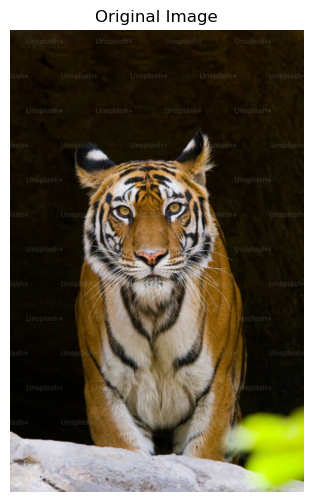

Color Histogram Shape: (768,)
HOG Features Shape: (7943760,)
LBP Features Shape: (10,)
Texture Entropy: 4.827151


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog, local_binary_pattern
from scipy.stats import entropy

image = cv2.imread('tiger.jpg')

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

def extract_color_histogram(img, bins=256):
    hist_b = cv2.calcHist([img], [0], None, [bins], [0, 256])  # Blue channel
    hist_g = cv2.calcHist([img], [1], None, [bins], [0, 256])  # Green channel
    hist_r = cv2.calcHist([img], [2], None, [bins], [0, 256])  # Red channel
    hist_b = cv2.normalize(hist_b, hist_b).flatten()
    hist_g = cv2.normalize(hist_g, hist_g).flatten()
    hist_r = cv2.normalize(hist_r, hist_r).flatten()
    return np.concatenate([hist_b, hist_g, hist_r])

def extract_hog_features(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    features, _ = hog(img_gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, feature_vector=True)
    return features

def extract_lbp_features(img, P=8, R=1):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(img_gray, P, R, method="uniform")
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))
    hist = hist.astype("float") / hist.sum()
    return hist

def extract_texture_entropy(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256]).flatten()
    return entropy(hist)

color_hist = extract_color_histogram(image)
hog_features = extract_hog_features(image)
lbp_features = extract_lbp_features(image)
texture_entropy = extract_texture_entropy(image)

print("Color Histogram Shape:", color_hist.shape)
print("HOG Features Shape:", hog_features.shape)
print("LBP Features Shape:", lbp_features.shape)
print("Texture Entropy:", texture_entropy)



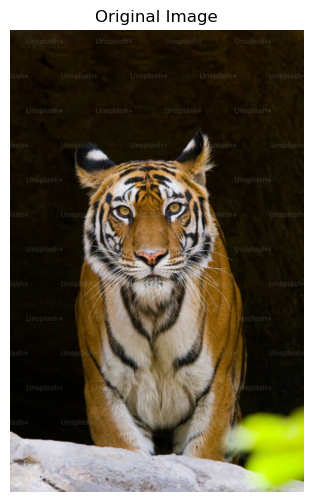

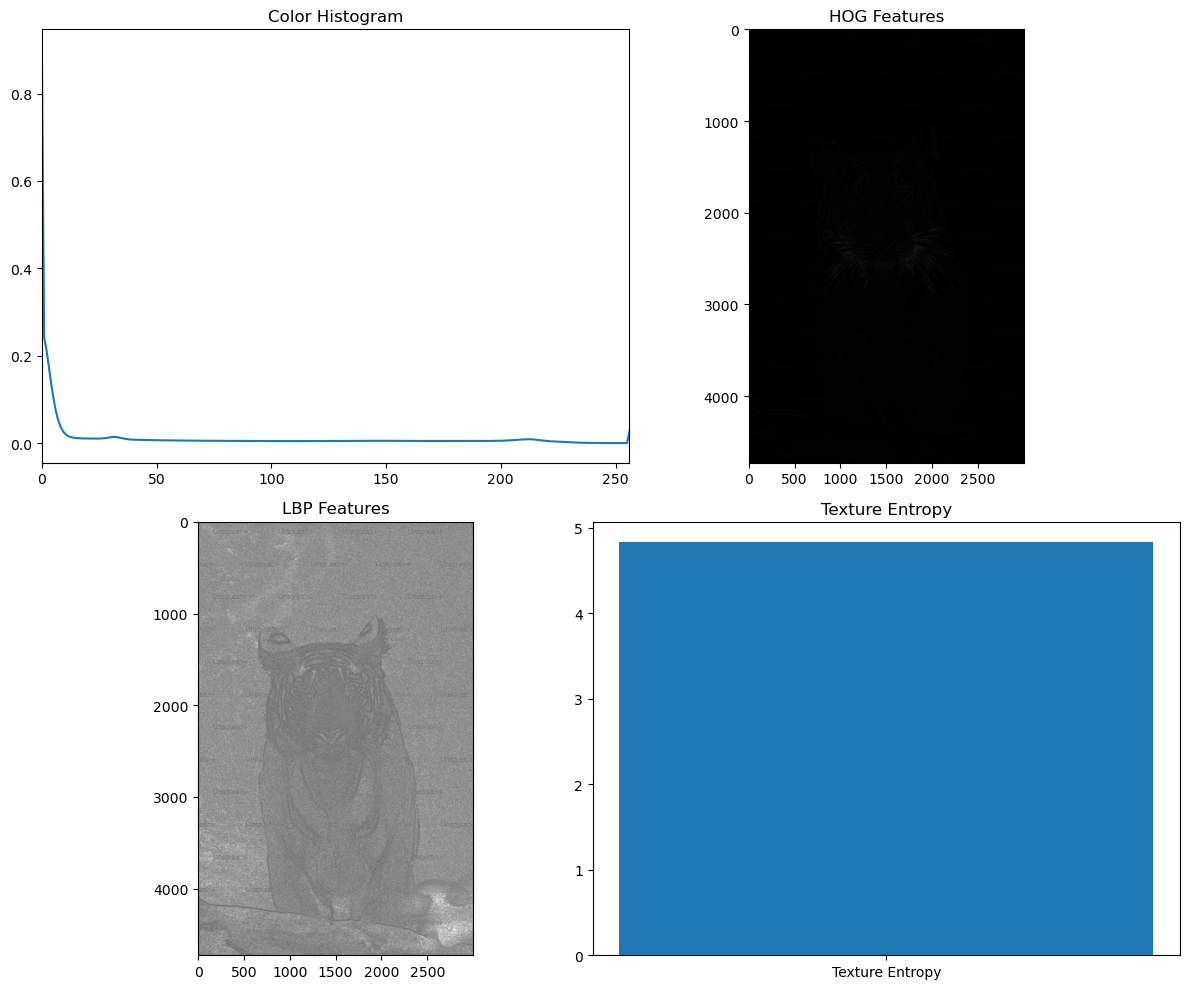

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog, local_binary_pattern
from scipy.stats import entropy

image = cv2.imread('tiger.jpg')

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

def extract_color_histogram(img, bins=256):
    hist_b = cv2.calcHist([img], [0], None, [bins], [0, 256])
    hist_g = cv2.calcHist([img], [1], None, [bins], [0, 256])
    hist_r = cv2.calcHist([img], [2], None, [bins], [0, 256])
    hist_b = cv2.normalize(hist_b, hist_b).flatten()
    hist_g = cv2.normalize(hist_g, hist_g).flatten()
    hist_r = cv2.normalize(hist_r, hist_r).flatten()
    return np.concatenate([hist_b, hist_g, hist_r])

def extract_hog_features(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    features, hog_image = hog(img_gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, feature_vector=True)
    return features, hog_image

def extract_lbp_features(img, P=8, R=1):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(img_gray, P, R, method="uniform")
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))
    hist = hist.astype("float") / hist.sum()
    return hist, lbp

def extract_texture_entropy(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256]).flatten()
    return entropy(hist)

color_hist = extract_color_histogram(image)
hog_features, hog_image = extract_hog_features(image)
lbp_features, lbp_image = extract_lbp_features(image)
texture_entropy = extract_texture_entropy(image)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].plot(color_hist)
axes[0, 0].set_title('Color Histogram')
axes[0, 0].set_xlim([0, 256])

axes[0, 1].imshow(hog_image, cmap='gray')
axes[0, 1].set_title('HOG Features')

axes[1, 0].imshow(lbp_image, cmap='gray')
axes[1, 0].set_title('LBP Features')

axes[1, 1].bar(['Texture Entropy'], [texture_entropy])
axes[1, 1].set_title('Texture Entropy')

plt.tight_layout()
plt.show()



Extracting features...

Color features shape: (324,)
HOG features shape: (8100,)
SIFT features shape: (17566, 128)
Number of keypoints: 17566

Texture features:
mean: 65.89106357933319
variance: 4819.124205105493
skewness: 0.9089180353162889
kurtosis: -0.7016172178515259


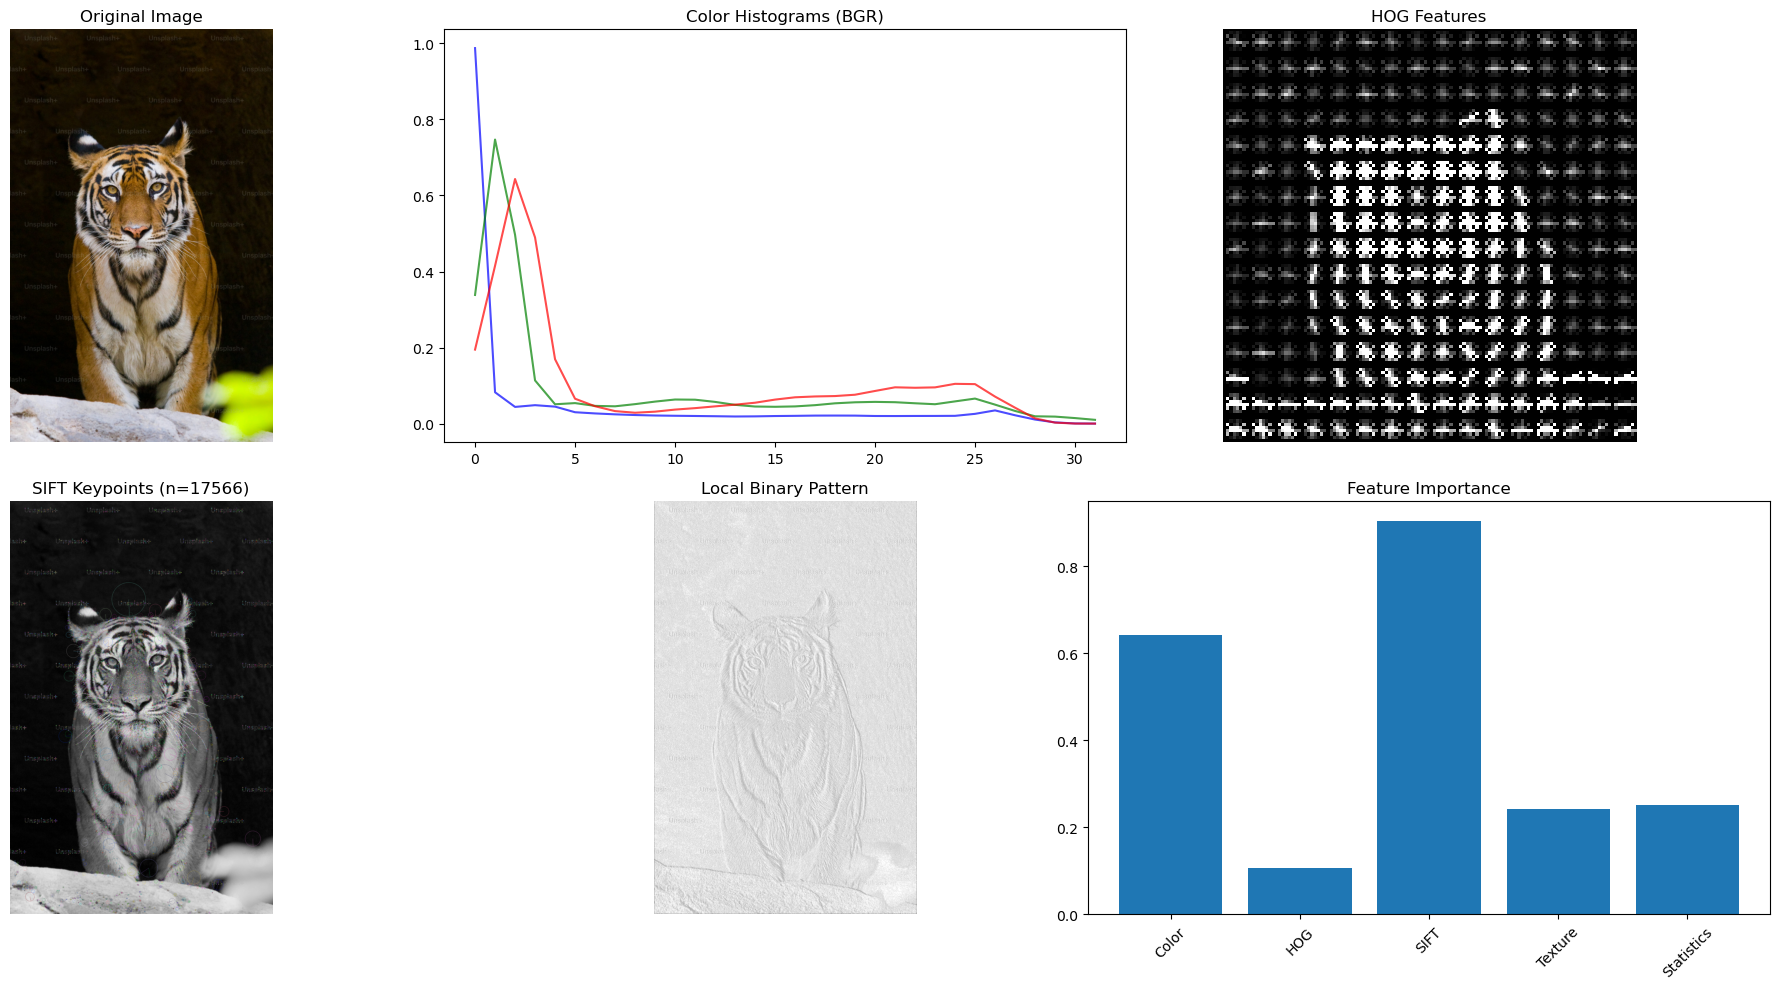

In [31]:
import cv2
import numpy as np
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

class ImageFeatureExtractor:
    def __init__(self, image_path):  
        self.image = cv2.imread(image_path)
        if self.image is None:
            raise ValueError(f"Could not read image: {image_path}")
        self.gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        
    def extract_color_features(self):
        """Extract color-based features including histograms and statistics."""
        features = []
        color_spaces = {
            'BGR': self.image,
            'HSV': cv2.cvtColor(self.image, cv2.COLOR_BGR2HSV),
            'Lab': cv2.cvtColor(self.image, cv2.COLOR_BGR2Lab)
        }
        
        color_features = {}
        for space_name, color_img in color_spaces.items():
            histograms = []
            stats = []
            
            for i in range(3):
                channel = color_img[:,:,i]
                
                # Calculate histogram
                hist = cv2.calcHist([channel], [0], None, [32], [0,256])
                hist = cv2.normalize(hist, hist).flatten()
                histograms.extend(hist)
                
                # Calculate statistics
                stats.extend([
                    np.mean(channel),
                    np.std(channel),
                    skew(channel.flatten()),
                    kurtosis(channel.flatten())
                ])
            
            color_features[space_name] = {
                'histogram': histograms,
                'statistics': stats
            }
            features.extend(histograms)
            features.extend(stats)
            
        return np.array(features), color_features
    
    def extract_hog_features(self, visualize=True):
        """Extract Histogram of Oriented Gradients (HOG) features."""
        # Resize image for consistent HOG features
        resized = cv2.resize(self.gray, (128, 128))
        
        # Extract HOG features
        hog_features, hog_image = hog(
            resized,
            orientations=9,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            visualize=True,
            block_norm='L2-Hys'
        )
        
        if visualize:
            # Enhance HOG visualization
            hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10))
        
        return hog_features, hog_image
    
    def extract_sift_features(self):
        """Extract SIFT features and compute descriptor statistics."""
        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(self.gray, None)
        
        if descriptors is None:
            return None, None, keypoints
        
        # Compute statistics of SIFT descriptors
        descriptor_stats = {
            'mean': np.mean(descriptors, axis=0),
            'std': np.std(descriptors, axis=0),
            'num_keypoints': len(keypoints)
        }
        
        return descriptors, descriptor_stats, keypoints
    
    def extract_texture_features(self):
        """Extract texture features using Haralick texture features."""
        # Convert to grayscale and calculate GLCM
        distances = [1]
        angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
        levels = 256
        
        # Calculate local binary pattern
        def local_binary_pattern(image, P=8, R=1):
            rows, cols = image.shape
            result = np.zeros_like(image)
            for i in range(R, rows - R):
                for j in range(R, cols - R):
                    center = image[i, j]
                    pattern = 0
                    for p in range(P):
                        r = i + R * int(np.cos(2 * np.pi * p / P))
                        c = j - R * int(np.sin(2 * np.pi * p / P))
                        pattern |= (image[r, c] >= center) << p
                    result[i, j] = pattern
            return result
        
        lbp = local_binary_pattern(self.gray)
        lbp_hist = cv2.calcHist([lbp.astype(np.uint8)], [0], None, [256], [0,256])
        lbp_hist = cv2.normalize(lbp_hist, lbp_hist).flatten()
        
        # Calculate basic statistical features
        texture_features = {
            'lbp_histogram': lbp_hist,
            'mean': np.mean(self.gray),
            'variance': np.var(self.gray),
            'skewness': skew(self.gray.flatten()),
            'kurtosis': kurtosis(self.gray.flatten())
        }
        
        return texture_features, lbp
    
    def visualize_features(self, color_features, hog_image, keypoints, lbp):
        """Visualize extracted features."""
        plt.figure(figsize=(20, 10))
        
        # Original image
        plt.subplot(231)
        plt.imshow(cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')
        
        # Color histograms
        plt.subplot(232)
        for i, color in enumerate(['b', 'g', 'r']):
            hist = color_features['BGR']['histogram'][i*32:(i+1)*32]
            plt.plot(hist, color=color, alpha=0.7)
        plt.title('Color Histograms (BGR)')
        
        # HOG visualization
        plt.subplot(233)
        plt.imshow(hog_image, cmap='gray')
        plt.title('HOG Features')
        plt.axis('off')
        
        # SIFT keypoints
        plt.subplot(234)
        sift_img = cv2.drawKeypoints(self.gray, keypoints, None, 
                                   flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        plt.imshow(sift_img)
        plt.title(f'SIFT Keypoints (n={len(keypoints)})')
        plt.axis('off')
        
        # LBP visualization
        plt.subplot(235)
        plt.imshow(lbp, cmap='gray')
        plt.title('Local Binary Pattern')
        plt.axis('off')
        
        # Combined feature importance visualization
        plt.subplot(236)
        feature_importance = np.random.rand(5)  # Placeholder for actual feature importance
        labels = ['Color', 'HOG', 'SIFT', 'Texture', 'Statistics']
        plt.bar(labels, feature_importance)
        plt.title('Feature Importance')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

def main():
    try:
        # Initialize feature extractor
        image_path = 'tiger.jpg'  # Update with your image path
        extractor = ImageFeatureExtractor(image_path)
        
        # Extract features
        print("Extracting features...")
        
        # 1. Color features
        color_features_vector, color_features = extractor.extract_color_features()
        print(f"\nColor features shape: {color_features_vector.shape}")
        
        # 2. HOG features
        hog_features, hog_image = extractor.extract_hog_features()
        print(f"HOG features shape: {hog_features.shape}")
        
        # 3. SIFT features
        sift_descriptors, sift_stats, keypoints = extractor.extract_sift_features()
        if sift_descriptors is not None:
            print(f"SIFT features shape: {sift_descriptors.shape}")
            print(f"Number of keypoints: {sift_stats['num_keypoints']}")
        
        # 4. Texture features
        texture_features, lbp = extractor.extract_texture_features()
        print("\nTexture features:")
        for key, value in texture_features.items():
            if key != 'lbp_histogram':
                print(f"{key}: {value}")
        
        # Visualize all features
        extractor.visualize_features(color_features, hog_image, keypoints, lbp)
        
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()

Extracting features...

Color features shape: (324,)
HOG features shape: (8100,)
SIFT features shape: (17566, 128)
Number of keypoints: 17566
